<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/YouTube_Comment_analyzer_with_ngrok_Interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install required packages
!pip install -q tensorflow scikit-learn pandas numpy

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import time

# STEP 3: Upload the CSV file
from google.colab import files
uploaded = files.upload()  # Upload your Tweets.csv file here

# STEP 4: Load and clean dataset
df = pd.read_csv('Tweets.csv')
df = df[df['airline_sentiment'].isin(['positive', 'negative', 'neutral'])]
df = df[['text', 'airline_sentiment']].dropna()

# Encode labels (0=negative, 1=neutral, 2=positive)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['airline_sentiment'])

# STEP 5: Tokenize and pad text data
max_vocab = 10000
max_len = 50

tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Prepare input and output
X = padded_sequences
y = to_categorical(df['label'], num_classes=3)

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 sentiment classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# STEP 8: Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
print(f"\n⏱️ Training completed in {(end_time - start_time):.2f} seconds.")

# STEP 9: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")

# STEP 10: Make predictions
def predict_sentiment(tweet):
    seq = tokenizer.texts_to_sequences([tweet])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(padded)
    label = label_encoder.inverse_transform([np.argmax(pred)])
    return label[0]

# Example predictions
print("Example 1:", predict_sentiment("I love the flight experience."))
print("Example 2:", predict_sentiment("Worst service ever, very disappointed."))
print("Example 3:", predict_sentiment("It was okay, nothing special."))


Saving Tweets.csv to Tweets.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.6605 - loss: 0.7838 - val_accuracy: 0.7995 - val_loss: 0.5273
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8365 - loss: 0.4330 - val_accuracy: 0.8105 - val_loss: 0.4888
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9016 - loss: 0.2777 - val_accuracy: 0.7968 - val_loss: 0.5639
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9253 - loss: 0.2134 - val_accuracy: 0.7958 - val_loss: 0.5753
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9437 - loss: 0.1655 - val_accuracy: 0.7835 - val_loss: 0.7794

⏱️ Training completed in 163.80 seconds.
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7896 - loss: 0.7637
✅ Test Accuracy: 0.7835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
Example 1: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Example 2: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Example 3: neutral


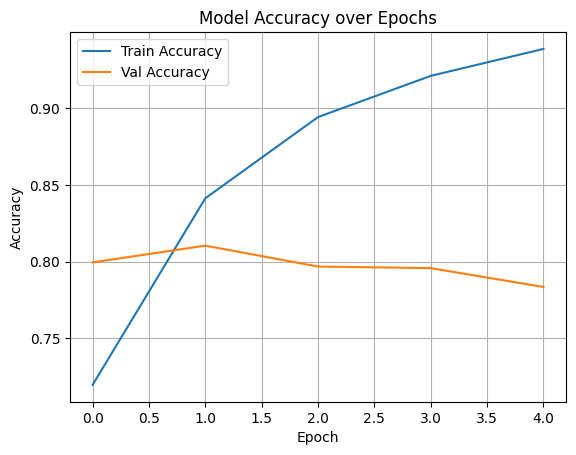

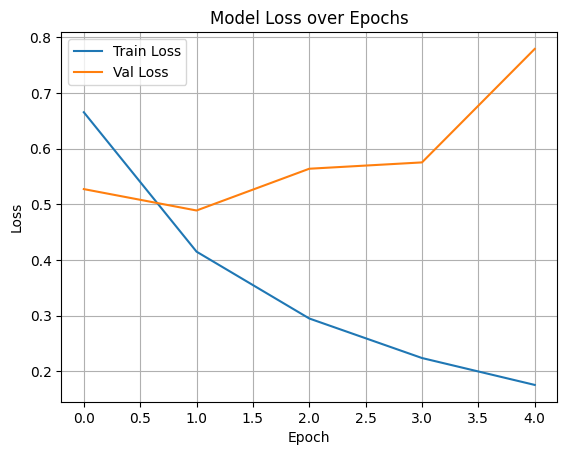

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:

from youtube_comment_downloader import YoutubeCommentDownloader
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import numpy as np
import json

# Load model
model = load_model("lstm_sentiment_model.h5")

# Load tokenizer
# Load tokenizer
with open("tokenizer.json") as f:
    tokenizer = tokenizer_from_json(f.read())


# Label mapping
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Function to predict a batch of comments
def predict_comments(comments):
    seq = tokenizer.texts_to_sequences(comments)
    padded = pad_sequences(seq, maxlen=50, padding='post', truncating='post')
    preds = model.predict(padded)
    labels = [label_map[np.argmax(p)] for p in preds]
    return labels

# Function to fetch and analyze YouTube comments
def analyze_video_comments(video_url, max_comments=100):
    downloader = YoutubeCommentDownloader()
    comments_data = downloader.get_comments_from_url(video_url, sort_by=0)  # ✅ fixed sort_by

    comments = [c['text'] for c in comments_data if 'text' in c][:max_comments]

    predictions = predict_comments(comments)

    from collections import Counter
    sentiment_counts = Counter(predictions)

    print("📊 Sentiment Counts:")
    print(sentiment_counts)

    return sentiment_counts


# Example Usage
video_url = "https://youtu.be/RVcf3a3o7EY?si=SLsMXt0r5niwJW8G"  # Replace with actual
result = analyze_video_comments(video_url)


ModuleNotFoundError: No module named 'youtube_comment_downloader'

In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok youtube-comment-downloader tensorflow


In [ ]:
from fastapi import FastAPI, Request
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import uvicorn
import nest_asyncio
from pyngrok import ngrok
import json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from youtube_comment_downloader import YoutubeCommentDownloader
from collections import Counter
import re
# ----------------------------- Load Model -----------------------------
model = load_model("lstm_sentiment_model.h5")

with open("tokenizer.json") as f:
    tokenizer = tokenizer_from_json(f.read())


MAXLEN = 100

# ------------------------- Sentiment Inference ------------------------
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)
    return text.lower().strip()

def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([clean_text(text)])
    padded = pad_sequences(seq, maxlen=MAXLEN)
    pred = model.predict(padded, verbose=0)[0]
    label = np.argmax(pred)
    return ["negative", "neutral", "positive"][label]

# --------------------------- Fetch Comments ---------------------------
def get_comments_from_youtube(url, max_comments=50):
    downloader = YoutubeCommentDownloader()
    comments = []
    try:
        for c in downloader.get_comments_from_url(url, sort_by=0):
            if 'text' in c:
                comments.append(c['text'])
                if len(comments) >= max_comments:
                    break
    except:
        pass
    return comments

# ------------------------------- App ----------------------------------
app = FastAPI()

@app.get("/", response_class=HTMLResponse)
async def home():
    return """
    <html>
    <head>
        <title>YouTube Sentiment Analyzer</title>
    </head>
    <body style='font-family:Arial;'>
        <h2>🎥 YouTube Sentiment Analyzer</h2>
        <input id='url' type='text' placeholder='Paste YouTube URL here' size='50'/>
        <input id='count' type='number' value='50' min='10' max='500' step='10' />
        <button onclick='analyze()'>Analyze</button>
        <pre id='output' style='margin-top:20px;background:#f0f0f0;padding:10px'></pre>

        <script>
        async function analyze() {
            const url = document.getElementById("url").value;
            const count = parseInt(document.getElementById("count").value);
            const res = await fetch(window.location.origin + "/analyze", {
                method: "POST",
                headers: {"Content-Type": "application/json"},
                body: JSON.stringify({url: url, max_comments: count})
            });
            const data = await res.json();
            document.getElementById("output").innerText = JSON.stringify(data, null, 2);
        }
        </script>
    </body>
    </html>
    """

class AnalyzeRequest(BaseModel):
    url: str
    max_comments: int = 50

@app.post("/analyze")
async def analyze(request: AnalyzeRequest):
    comments = get_comments_from_youtube(request.url, request.max_comments)
    sentiments = [predict_sentiment(c) for c in comments]
    counts = dict(Counter(sentiments))
    return counts

# --------------------------- Run in Colab -----------------------------
if __name__ == "__main__":
    nest_asyncio.apply()
    ngrok.set_auth_token("2zXsRe22QsUe78oI7erL0AM1FhW_7dzkSJa3pPHH4FmFVDWLx")
    ngrok.kill()
    public_url = ngrok.connect(8000)
    print("🚀 Public FastAPI URL:", public_url)
    uvicorn.run(app, port=8000)


ModuleNotFoundError: No module named 'pyngrok'